1. 
Stwórz dla domu maklerskiego graficzny dashboard, który pozwoli na podejmowanie decyzji o zakupie lub sprzedaży akcji Facebooka lub innych spółek. W tym celu wyświetl ceny akcji razem z średnią kroczącą z ostatnich 14 dni. Gdy aktualna cena spadnie poniżej średniej, to znak, że jesteśmy na górce i trzeba sprzedawać. Dodatkowo w dashboardzie umieść informacje o wolumenie sprzedaży, aby móc wykrywać nietypowe zdarzenia. Użyj w tym celu drugiej osi Y.2. 

Notowania Facebooka ściągniesz stąd: https://www.nasdaq.com/market-activity/stocks/fb/historical Możesz także pobrać notowania innych interesujących Cię spółek. Te same dane znajdziesz także w pliku M08/data/fb.csv3. .

Zauważysz, że dane są posortowane od najnowszych do najstarszych. Jak odwrócisz tę kolejność? Poszuk4. aj!

Wyceny akcji są poprzedzone znakiem dolara, np. $80.20. Napisz funkcję, która przyjmuje pojedynczy string, usuwa znak dolara i zwraca float'a. Użyj metody .map() na pojedynczej kolumnie, aby wyzwolić tę funkcję na każdym wierszu danych.

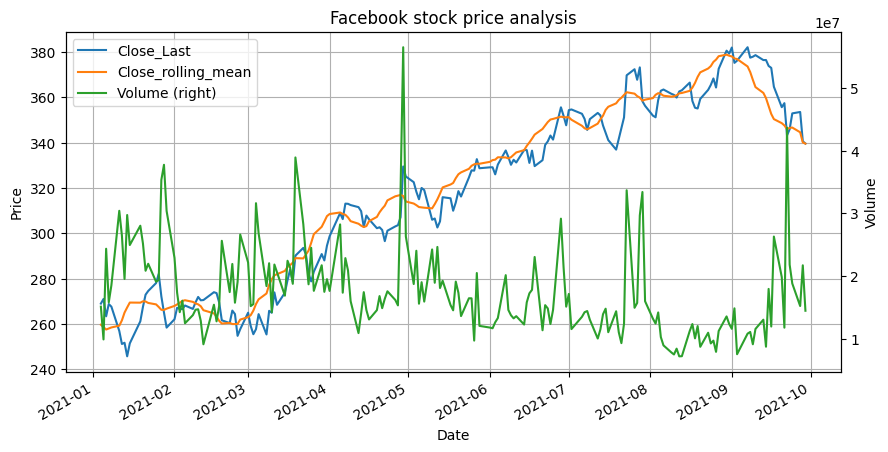

In [63]:
import pandas as pd

def remove_dollar_sign(x: str) -> float:
    return float(x[1:])

df_original = pd.read_csv(
    'fb.csv',
    parse_dates = ['Date'],
    index_col = 'Date',
).assign(
    Close_Last = lambda x: x['Close/Last'].map(remove_dollar_sign),
    Open = lambda x: x['Open'].map(remove_dollar_sign),
    High = lambda x: x['High'].map(remove_dollar_sign),
    Low = lambda x: x['Low'].map(remove_dollar_sign),
    Close_rolling_mean = lambda x: x['Close_Last'].rolling('14D').mean()
)

# reverse df
df = df_original.iloc[::-1]

# plot
df['2021-01':].plot(
    y = ['Close_Last', 'Close_rolling_mean'],
    figsize = (10,5),
    grid = True,
    title='Facebook stock price analysis',
).set_ylabel("Price");

ax = df['2021-01':]['Volume'].plot(secondary_y=True, legend=True);
ax.set_ylabel('Volume');

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,2357.0,3.080838e+07,2.766896e+07,5.913066e+06,1.557761e+07,2.213150e+07,3.569320e+07,5.793775e+08
Open,2357.0,1.394342e+02,8.432121e+01,1.808000e+01,7.493000e+01,1.309200e+02,1.848500e+02,3.816800e+02
High,2357.0,1.410608e+02,8.529324e+01,1.827000e+01,7.555000e+01,1.321300e+02,1.868017e+02,3.843300e+02
Low,2357.0,1.377886e+02,8.339783e+01,1.755000e+01,7.401000e+01,1.297000e+02,1.832228e+02,3.788100e+02
Close_Last,2357.0,1.394857e+02,8.439742e+01,1.772900e+01,7.483000e+01,1.310400e+02,1.853100e+02,3.821800e+02
Close_rolling_mean,2344.0,1.391960e+02,8.356995e+01,1.894589e+01,7.562161e+01,1.301318e+02,1.845880e+02,3.773371e+02


In [38]:
df.info();

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2357 entries, 2012-05-18 to 2021-09-29
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Close/Last          2357 non-null   object 
 1   Volume              2357 non-null   int64  
 2   Open                2357 non-null   float64
 3   High                2357 non-null   float64
 4   Low                 2357 non-null   float64
 5   Close_Last          2357 non-null   float64
 6   Close_rolling_mean  2344 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 211.9+ KB
